### Introducción a Pandas con Titanic

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import sidetable

import statsmodels.api as sm
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric import smoothers_lowess
from patsy import dmatrices

sns.set()

In [3]:
def filtrador(df, columna, valor):
    df = df.copy()
    df[columna] = df[columna].apply(np.floor)
    return df

In [4]:
titanic = sns.load_dataset('titanic')

In [5]:
titanic.pivot_table('survived', index='sex', columns='class',
                    aggfunc='count', margins=True)

class,First,Second,Third,All
sex,,,,
female,94,76,144,314
male,122,108,347,577
All,216,184,491,891


In [15]:
age = pd.cut(titanic['age'], range(0, 85, 5))
age.value_counts()
# titanic.pivot_table('survived', age,
#                     ['sex', 'class'], aggfunc='count', fill_value=0)

(20, 25]    122
(25, 30]    108
(15, 20]     96
(30, 35]     88
(35, 40]     67
(40, 45]     47
(0, 5]       44
(45, 50]     39
(50, 55]     24
(5, 10]      20
(10, 15]     19
(55, 60]     18
(60, 65]     14
(70, 75]      4
(65, 70]      3
(75, 80]      1
Name: age, dtype: int64

In [18]:
age = pd.qcut(titanic['age'], 4, labels=['Niños', 'Jovenes', 'Adultos', 'Mayores'])
age.value_counts()
# titanic.pivot_table('survived', index=[
#                     'sex', age], columns=['class'], fill_value=0)

Jovenes    183
Niños      179
Mayores    177
Adultos    175
Name: age, dtype: int64

In [23]:
titanic.pivot_table(index='pclass', columns='sex', aggfunc={
                'survived': 'count', 'fare': 'mean'})

fare            survived     
sex         female       male   female male
pclass                                     
1       106.125798  67.226127       94  122
2        21.970121  19.741782       76  108
3        16.118810  12.661633      144  347

In [24]:
titanic.pivot_table('survived', index='sex', columns='class', margins=True)

class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


In [25]:
clase = 'male'
edad = 55
titanic.query('age > @edad and sex == @clase')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
33,0,2,male,66.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
54,0,1,male,65.0,0,1,61.9792,C,First,man,True,B,Cherbourg,no,False
94,0,3,male,59.0,0,0,7.2500,S,Third,man,True,NaN,Southampton,no,True
96,0,1,male,71.0,0,0,34.6542,C,First,man,True,A,Cherbourg,no,True
116,0,3,male,70.5,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True
152,0,3,male,55.5,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
170,0,1,male,61.0,0,0,33.5000,S,First,man,True,B,Southampton,no,True
174,0,1,male,56.0,0,0,30.6958,C,First,man,True,A,Cherbourg,no,True
232,0,2,male,59.0,0,0,13.5000,S,Second,man,True,NaN,Southampton,no,True
252,0,1,male,62.0,0,0,26.5500,S,First,man,True,C,Southampton,no,True


In [196]:
titanic = (
    titanic
    .drop(['sibsp', 'parch', 'fare', 'embarked', 'who', 'adult_male',
           'deck', 'embark_town', 'alone', 'alive'], axis=1)
    .dropna()
    .query('sex=="female" and 15 < age < 25')
)
titanic

,survived,pclass,sex,age,class
38,0,3,female,18.0,Third
44,1,3,female,19.0,Third
49,0,3,female,18.0,Third
56,1,2,female,21.0,Second
68,1,3,female,17.0,Third
...,...,...,...,...,...
853,1,1,female,16.0,First
855,1,3,female,18.0,Third
858,1,3,female,24.0,Third
882,0,3,female,22.0,Third


Gráficos

https://www.kaggle.com/thulani96/titanic-dataset-analysis-with-seaborn

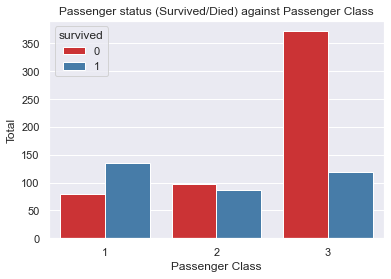

In [211]:
ax = sns.countplot(x='pclass', hue='survived', palette='Set1', data=titanic)
ax.set(title='Passenger status (Survived/Died) against Passenger Class',
       xlabel='Passenger Class', ylabel='Total')
plt.show()

survived    0    1
sex               
female     81  233
male      468  109


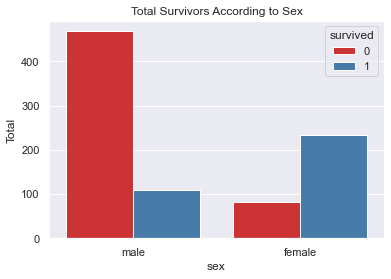

In [216]:
print(pd.crosstab(titanic["sex"], titanic['survived']))
ax = sns.countplot(x='sex', hue='survived', palette='Set1', data=titanic)
ax.set(title='Total Survivors According to Sex', xlabel='sex', ylabel='Total')
plt.show()

In [208]:
formula = 'survived ~ C(pclass) + C(sex) + age + sibsp  + C(embarked)'
# create a results dictionary to hold our regression results for easy analysis later
results = {}

In [209]:
y, x = dmatrices(formula, data=titanic, return_type='dataframe')
# instantiate our model
model = sm.Logit(y, x)

# fit our model to the training data
res = model.fit()

# save the result for outputing predictions later
results['Logit'] = [res, formula]
res.summary()

Optimization terminated successfully.
         Current function value: 0.444388
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      704
Method:                           MLE   Df Model:                            7
Date:                Sat, 28 Nov 2020   Pseudo R-squ.:                  0.3414
Time:                        23:04:49   Log-Likelihood:                -316.40
converged:                       True   LL-Null:                       -480.45
Covariance Type:            nonrobust   LLR p-value:                 5.992e-67
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            4.5423      0.474      9.583      0.000       3.613       5.471
C(pclass)[T.2]      -1.2673      0.299     -4.245      0.000      -1.852      -0.682
C(pclass)[T.3]      -2.4966      0.296     -8.422      0.000      -3.078      -1.916
C(sex)[T.male]      -2.6239      0.218    -12.060      0.000      -3.050      -2.197
C(embarked)[T.Q]    -0.8351      0.597     -1.398      0.162      -2.006       0.335
C(embarked)[T.S]    -0.4254      0.271     -1.572      0.116      -0.956       0.105
age                 -0.0436      0.008     -5.264      0.000      -0.060      -0.027
sibsp               -0.3697      0.123     -3.004      0.003      -0.611      -0.129
====================================================================================
"""

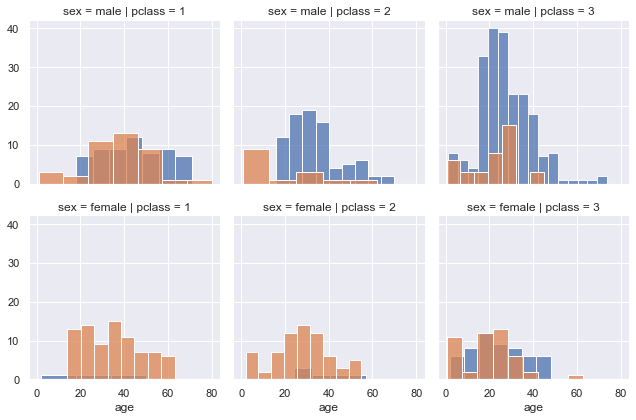

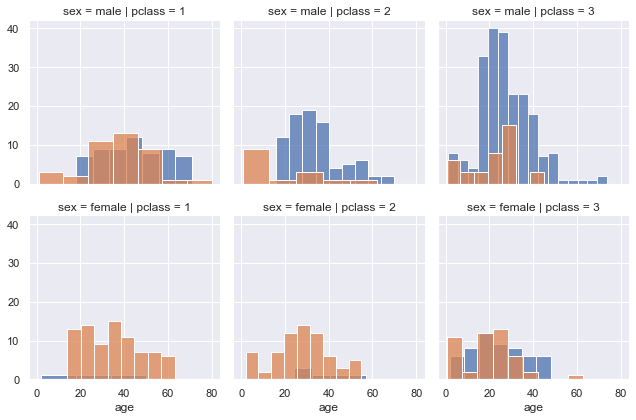

In [31]:
g = sns.FacetGrid(titanic, col='pclass', row='sex', hue='survived')
g.map(sns.histplot, 'age');
g.fig

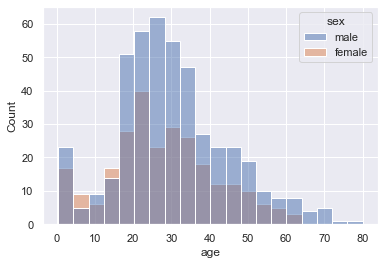

In [30]:
sns.histplot(data=titanic, x='age', hue="sex");